In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886080501PNS003SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.427e-02 +/- 1.578e-03 (39.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-58
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.614e+04 sec
 Using fit statistic: chi
 Using Background File                P0886080501PNS003BGSPEC0002.FTZ
  Background Exposure Time: 2.614e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886080501PNS003SRCARF0002.FTZ



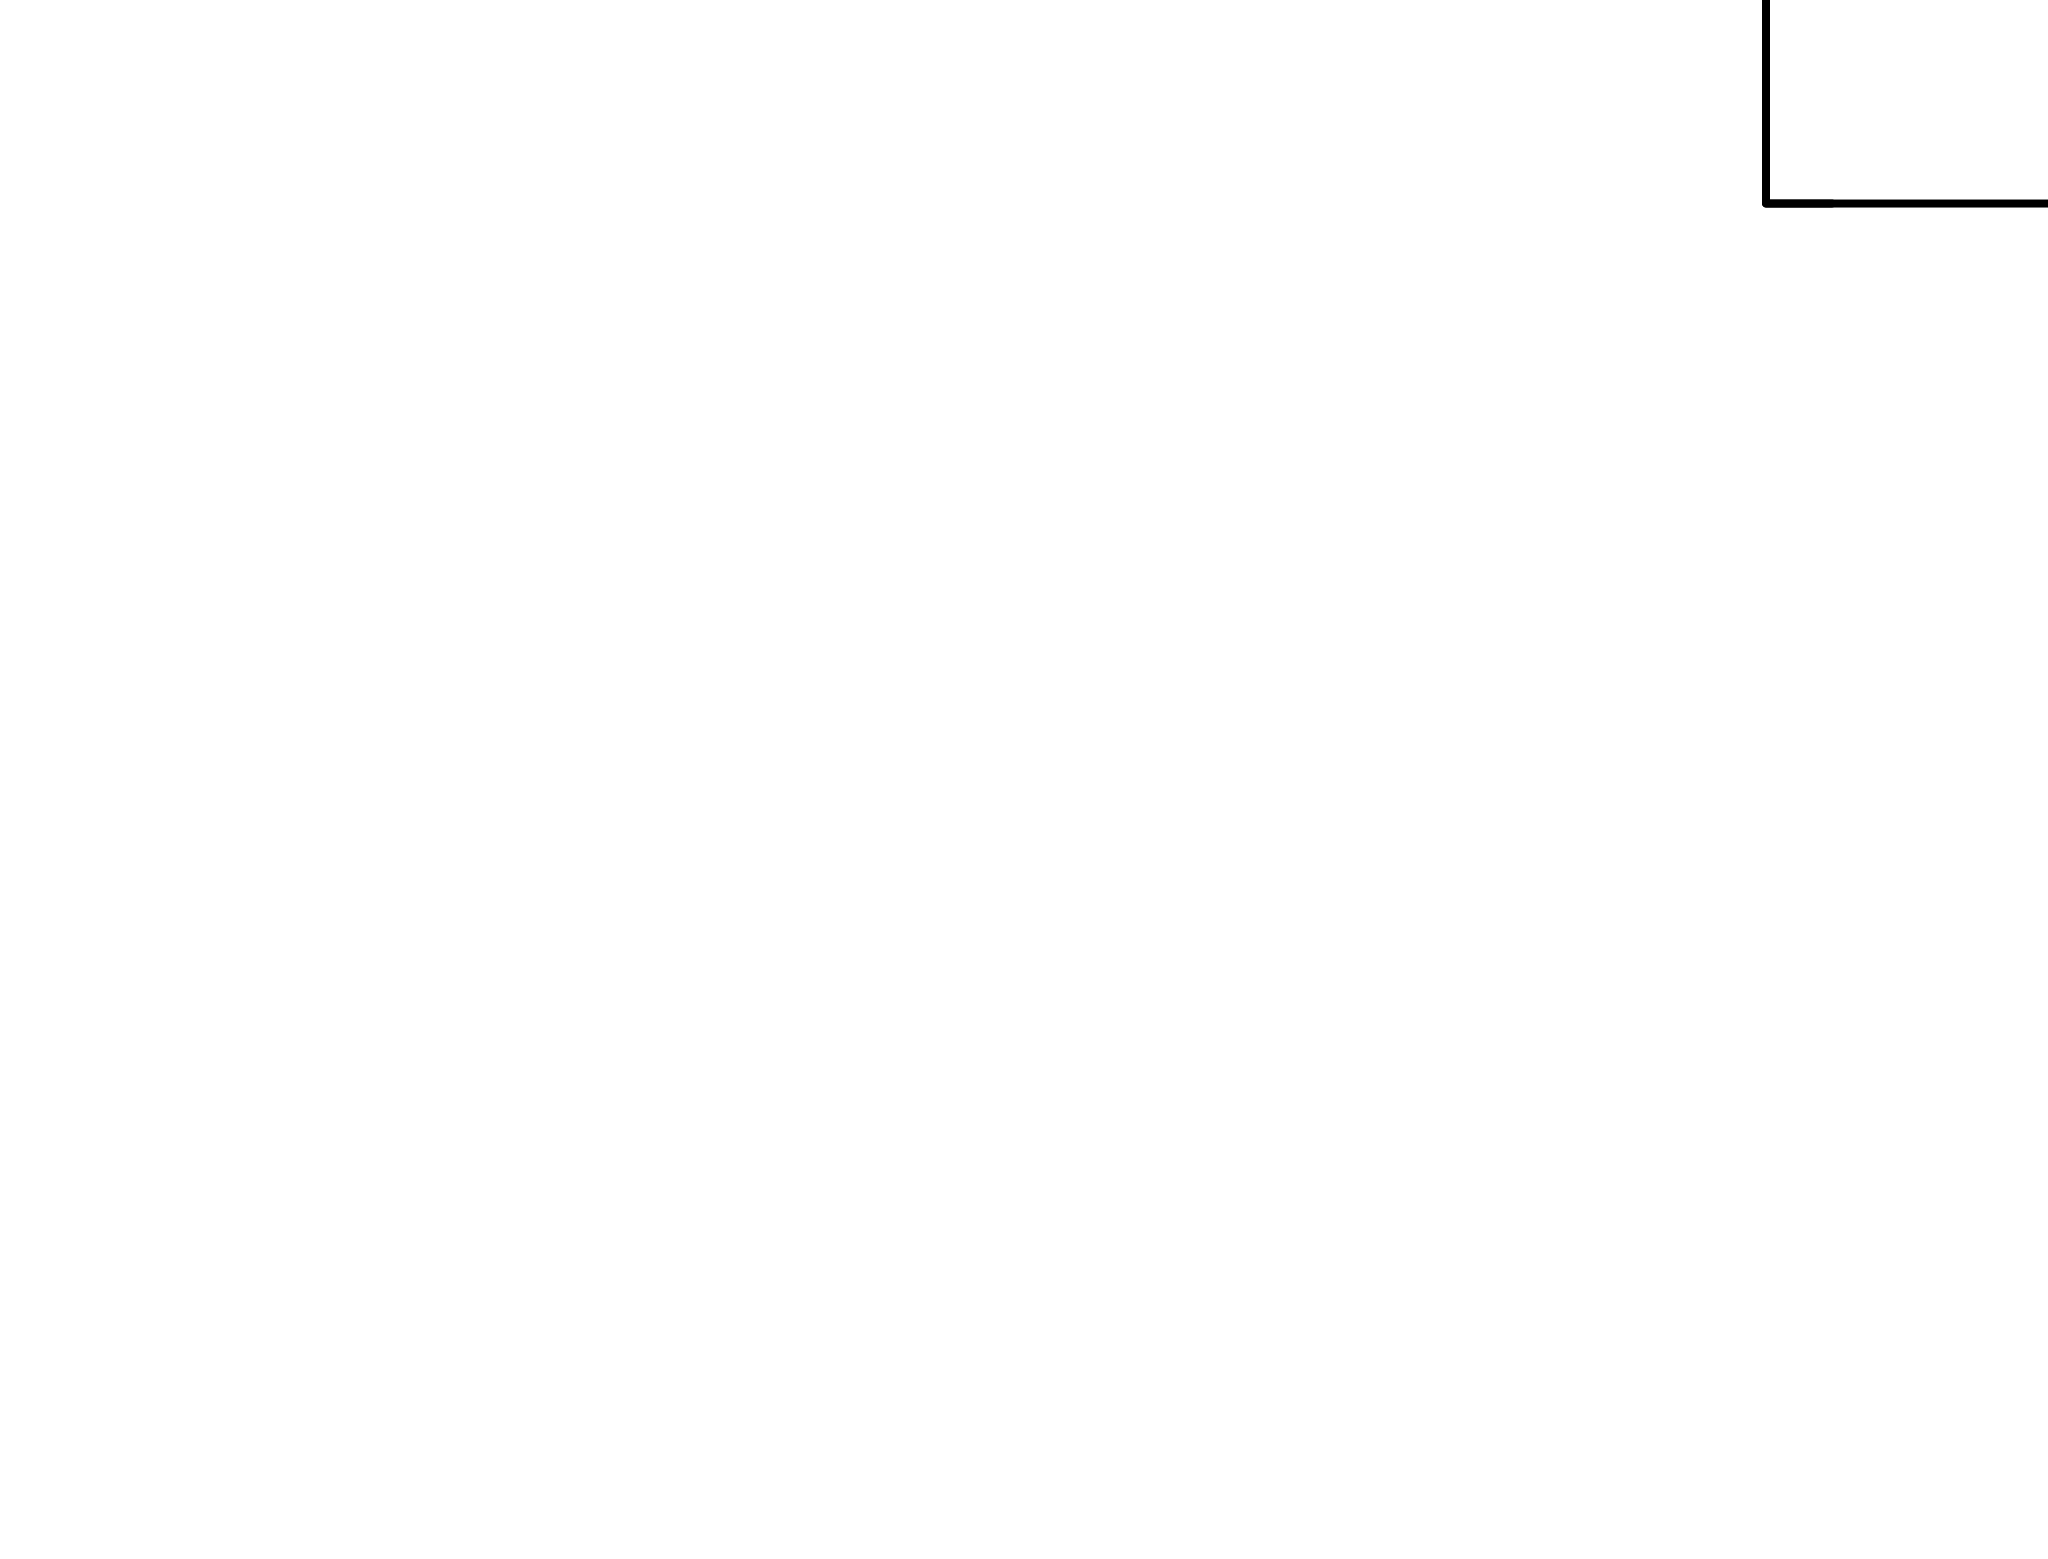

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (58) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

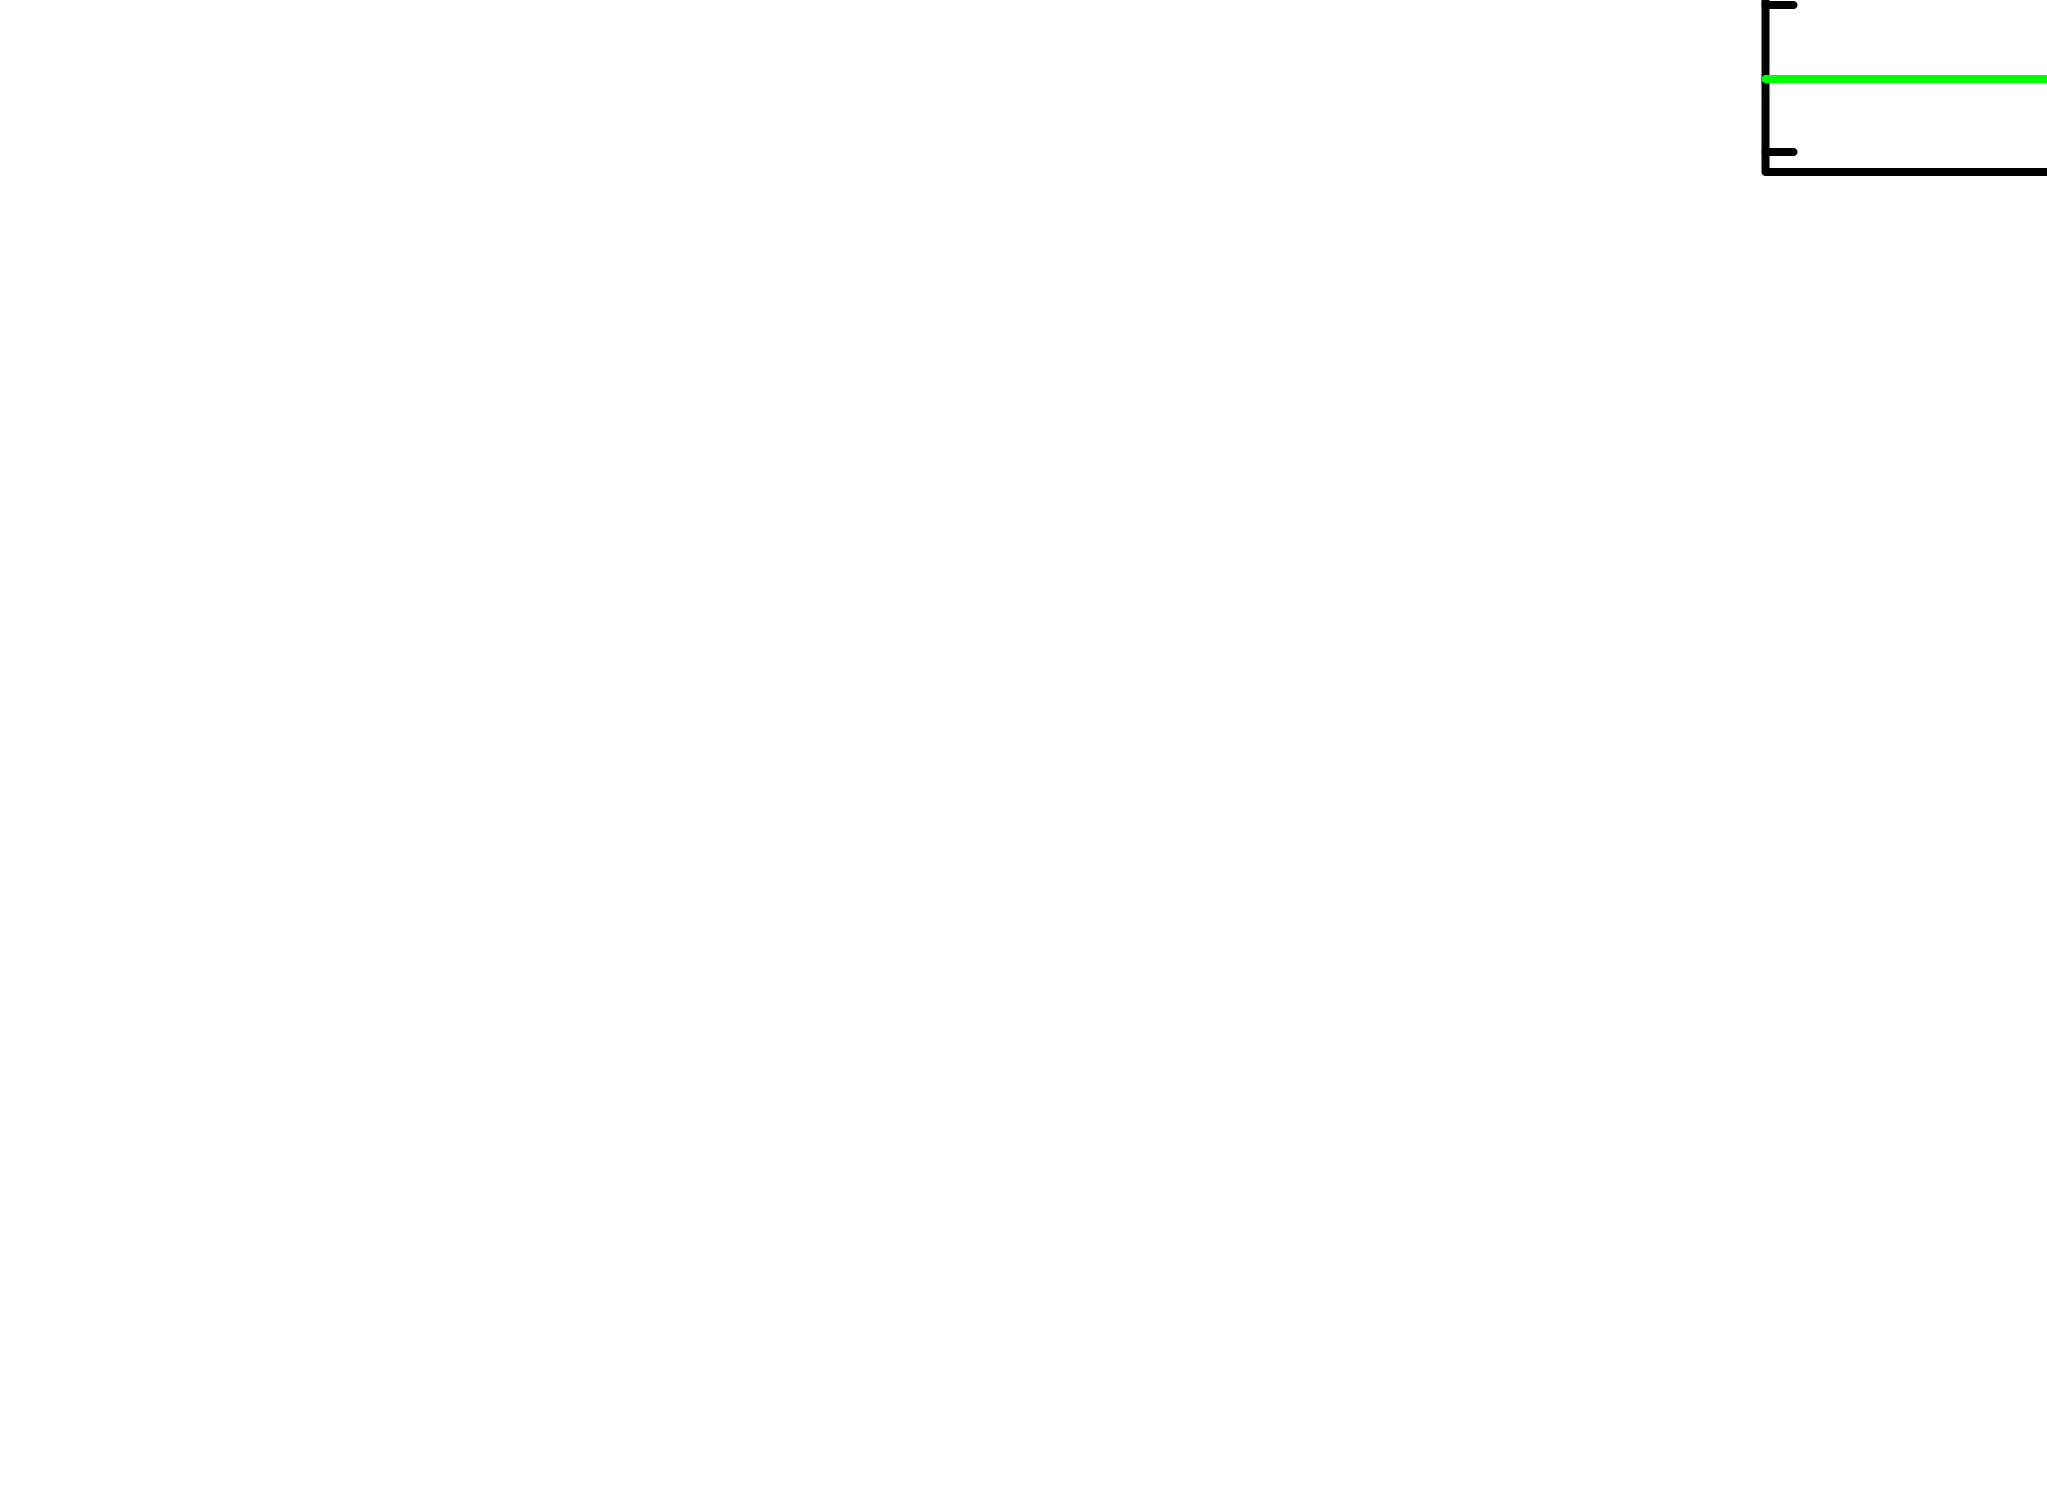

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

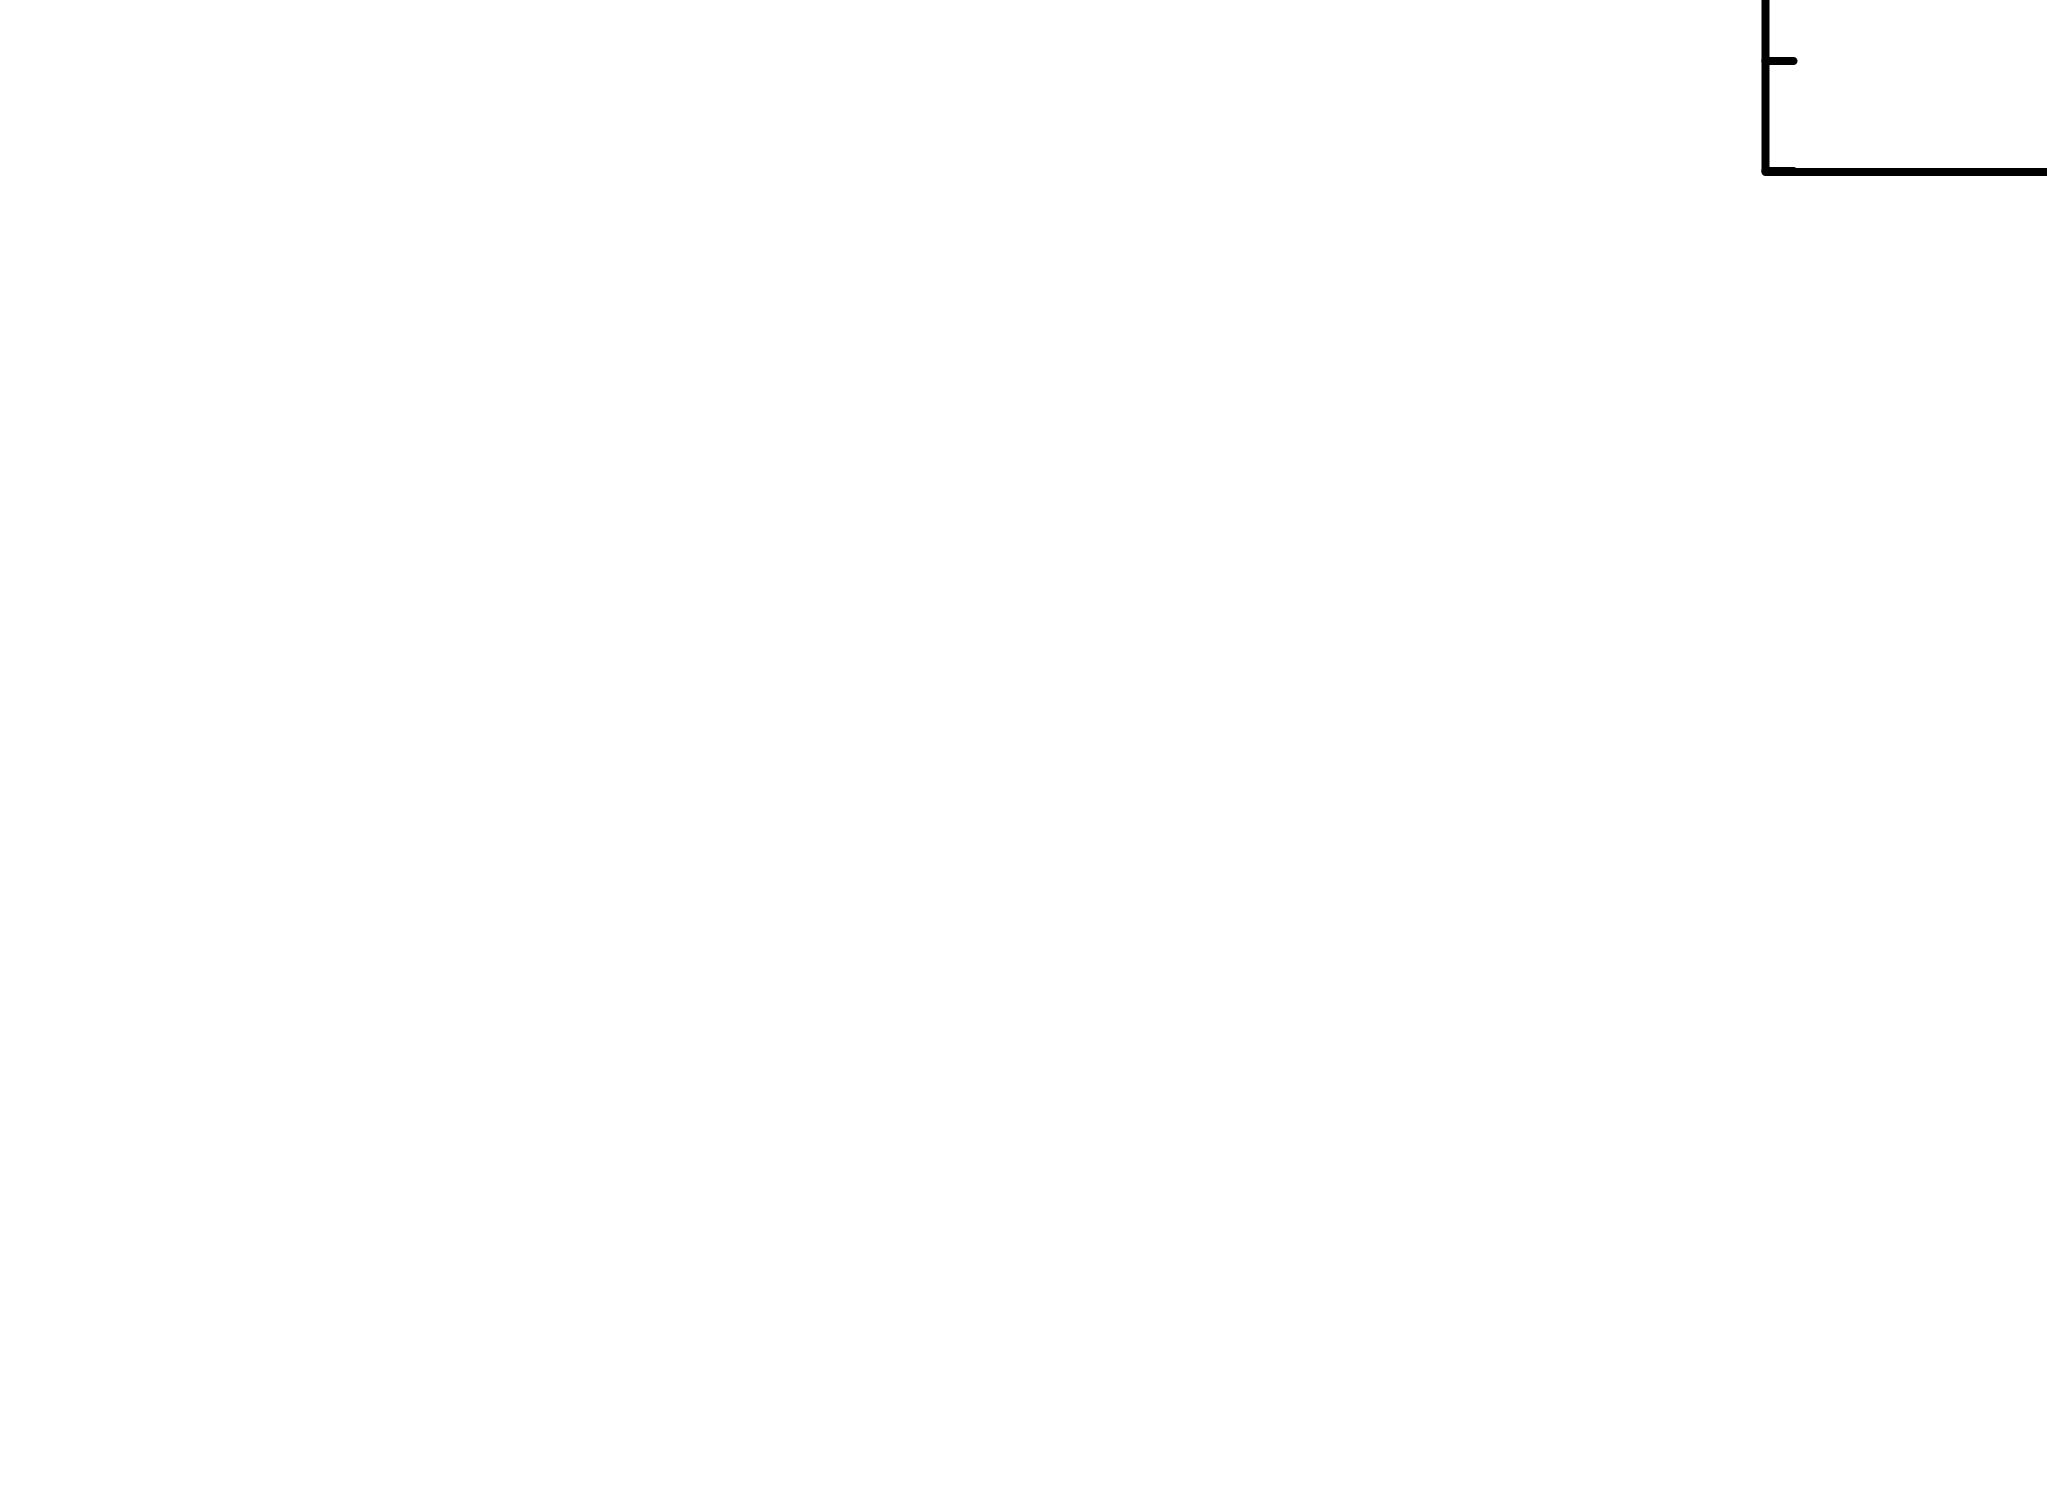


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.344780e+11     using 57 bins.

Test statistic : Chi-Squared              3.344780e+11     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 54 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
528.479      0.202111     -1      0.460223       6.77088   7.22380e-08
388.971      1.87125e+06   1      0.193084       9.27181   7.05275e-07
388.255      4.00845e+06   0      0.194073       9.26508   7.03217e-0

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.515633e+10     using 57 bins.

Test statistic : Chi-Squared              5.515633e+10     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 54 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
523.99       2.39691      -3      0.468992       80.8803   3.75980e-06
471.326      201580       -2      0.153936       198.636   3.79804e-05
436.558      46520.1       0     0.0593421       199.174   2.79938e-05


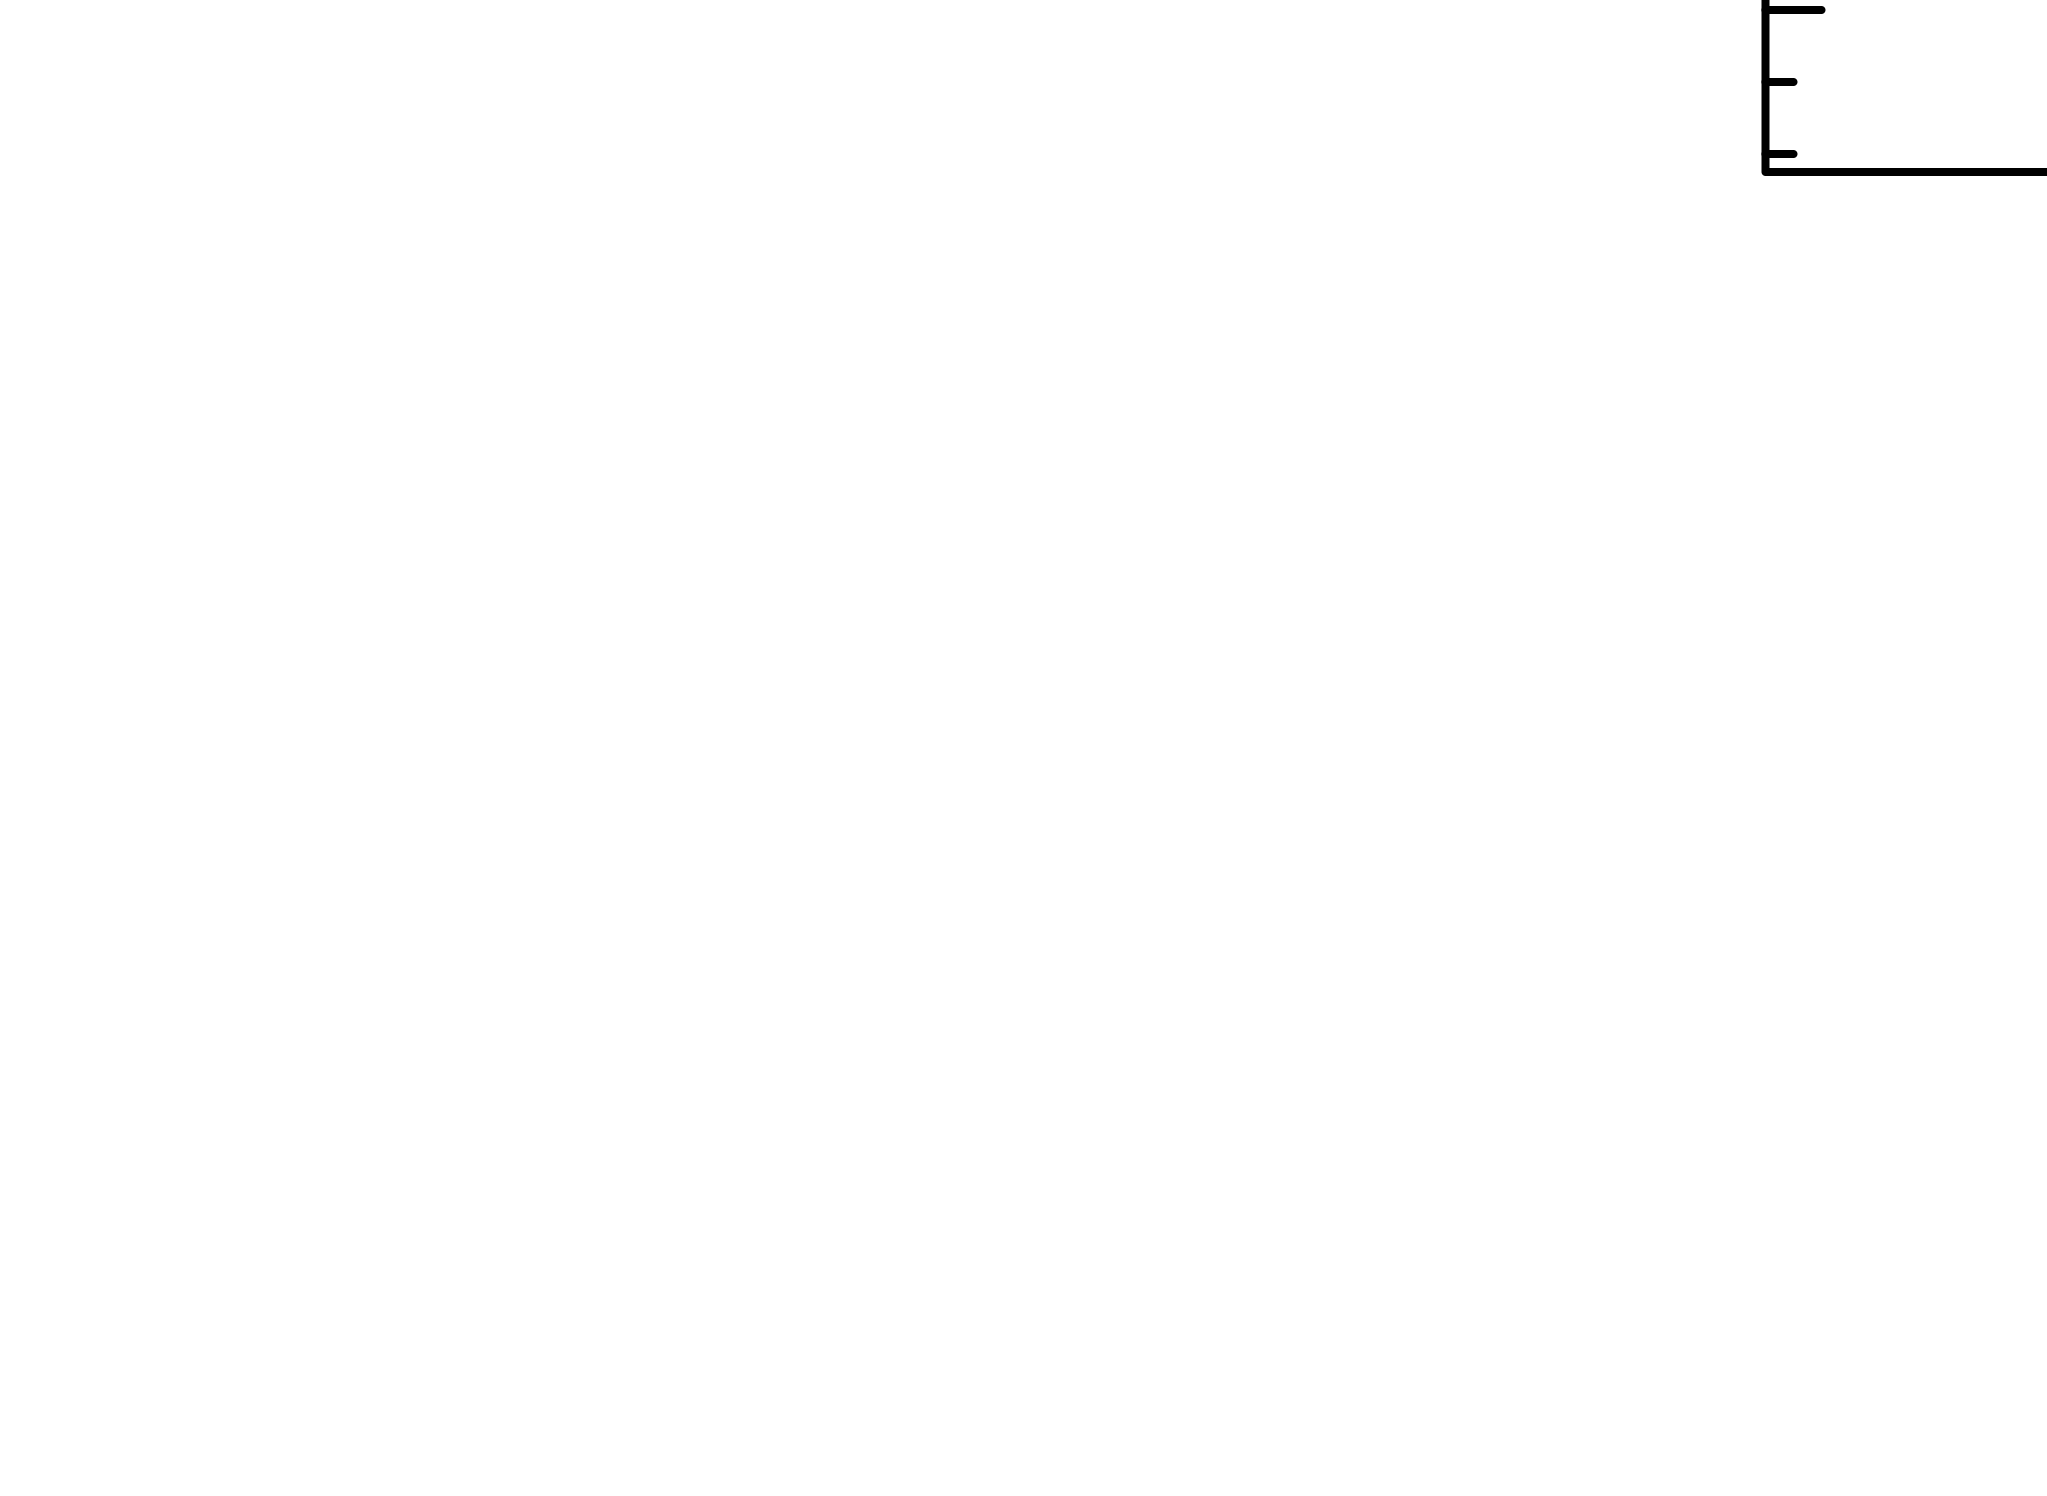

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

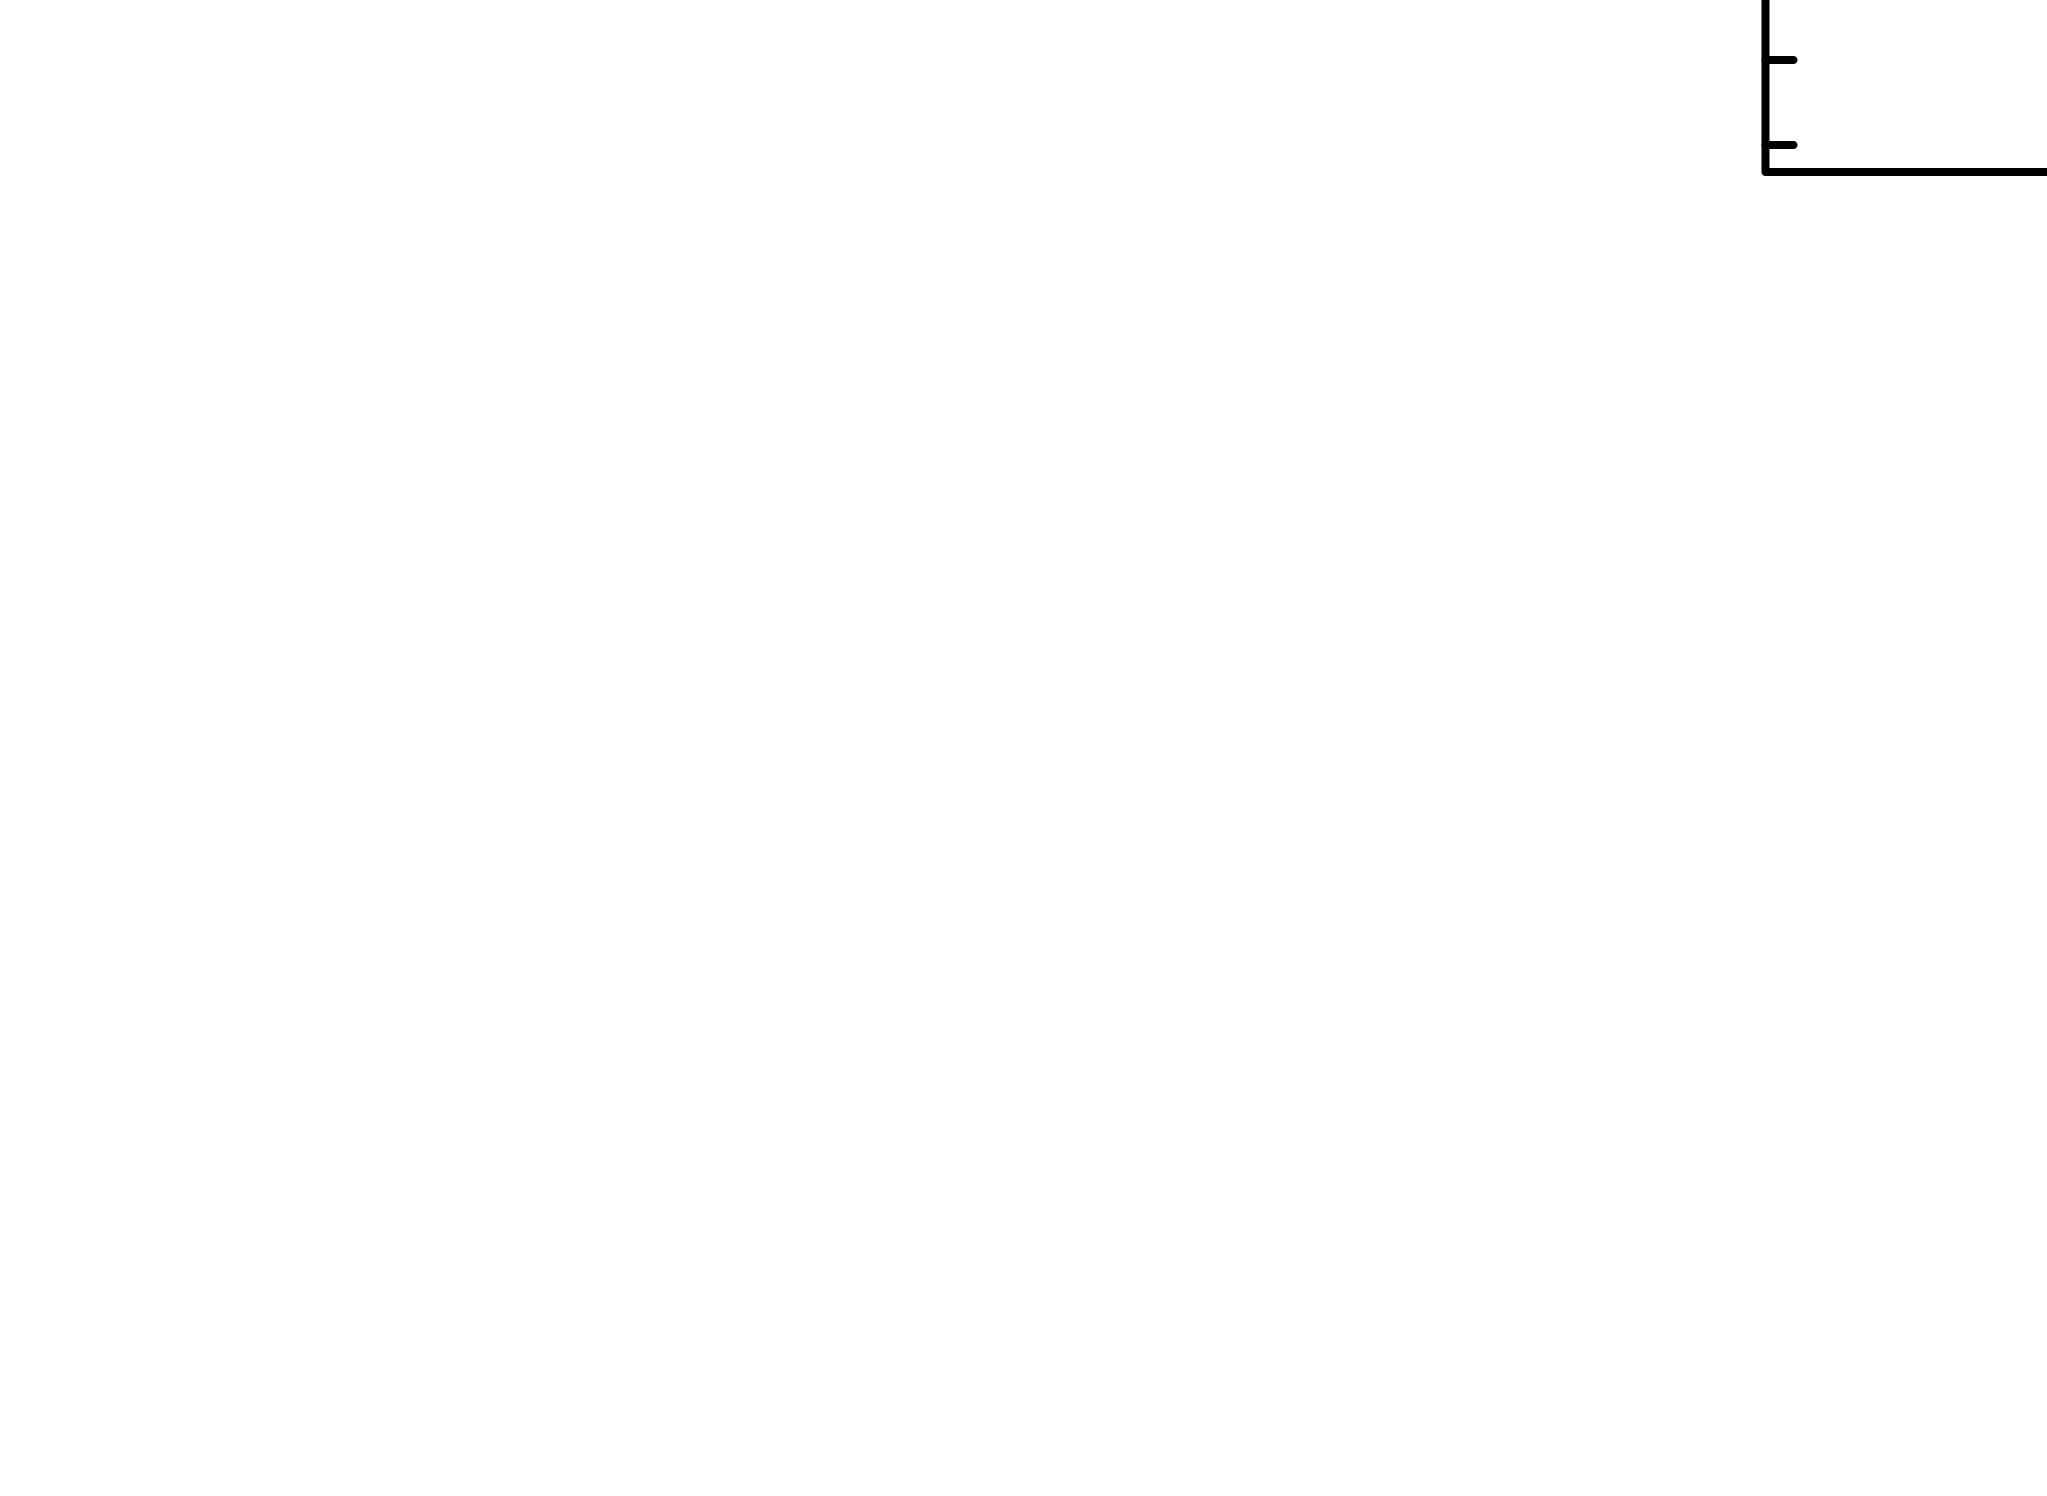


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.518125e+09     using 57 bins.

Test statistic : Chi-Squared              9.518125e+09     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 54 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
334.417      34.4587      -3      0.418202      0.730322   

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

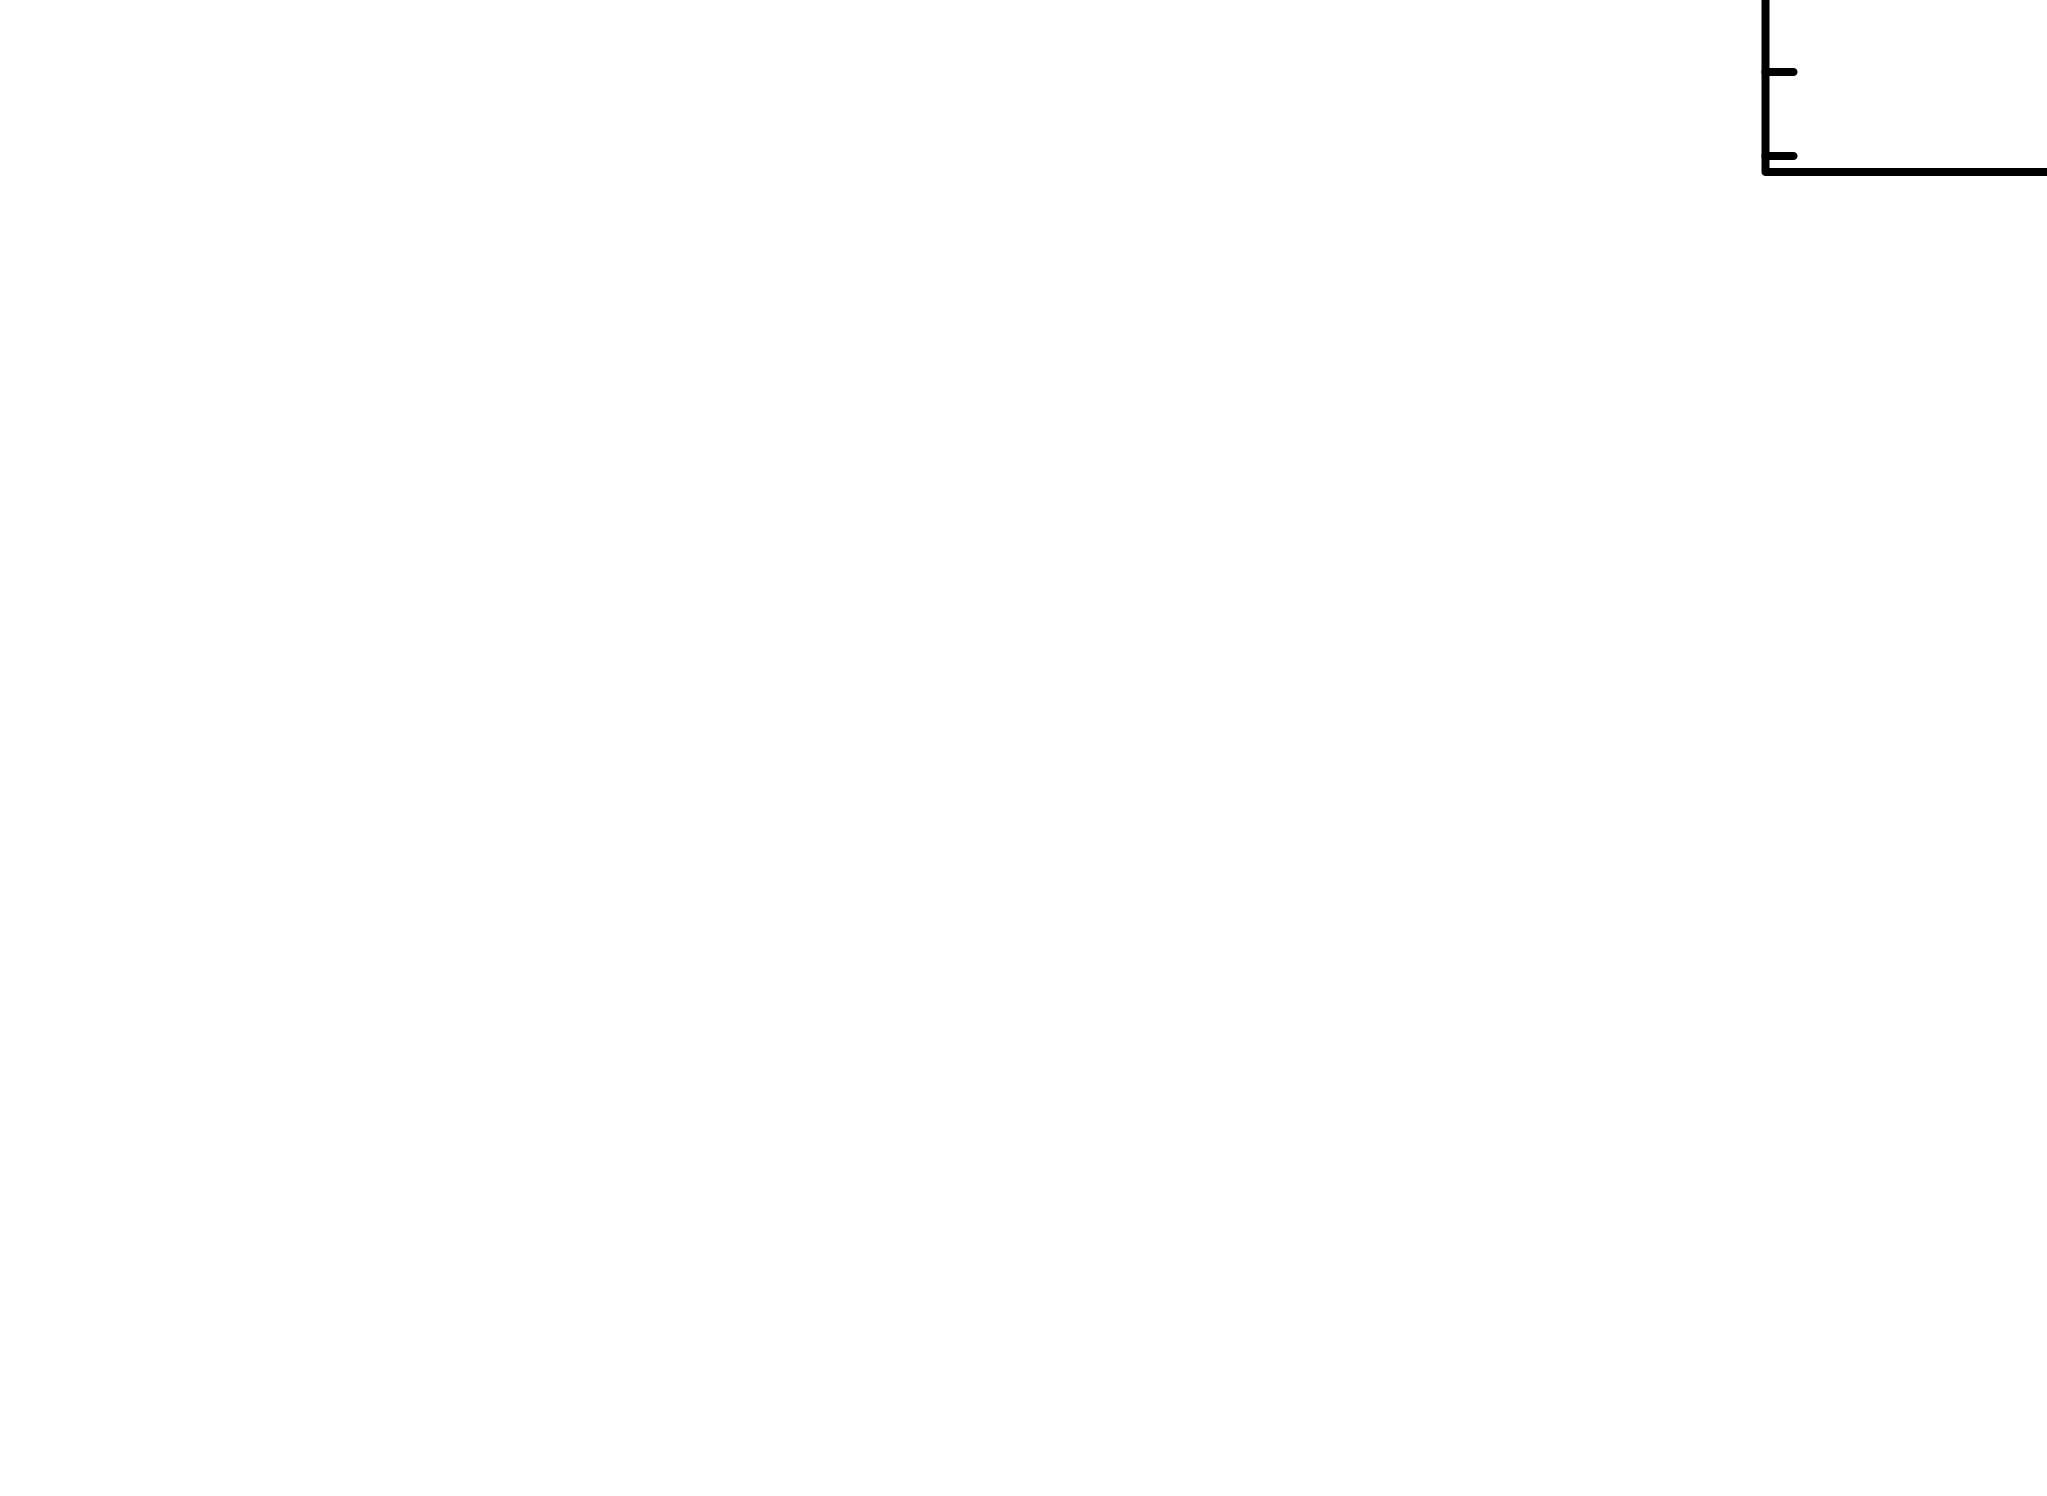


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.807632e+10     using 57 bins.

Test statistic : Chi-Squared              3.807632e+10     using 57 bins.
 Null hypothesis probability

In [7]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.3
mo.apec_3.kT = 1.2
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 8.9398e-05 photons (8.9936e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 35.20
d_kpc = 1/plx
F_x = 7.5648*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

7.302870616958675e+27


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.028409090909090908
27.8634936064283


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*13.65)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  3.6407369297515754e-11
F_x / F_opt:  -2.6823918485408136



Model TBabs<1>(apec<2> + apec<3> + apec<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
  10    4   apec       kT         keV      1.00000      +/-  0.0          
  11    4   apec       Abundanc            1.00000      frozen
  12    4   apec       Redshift            0.0         

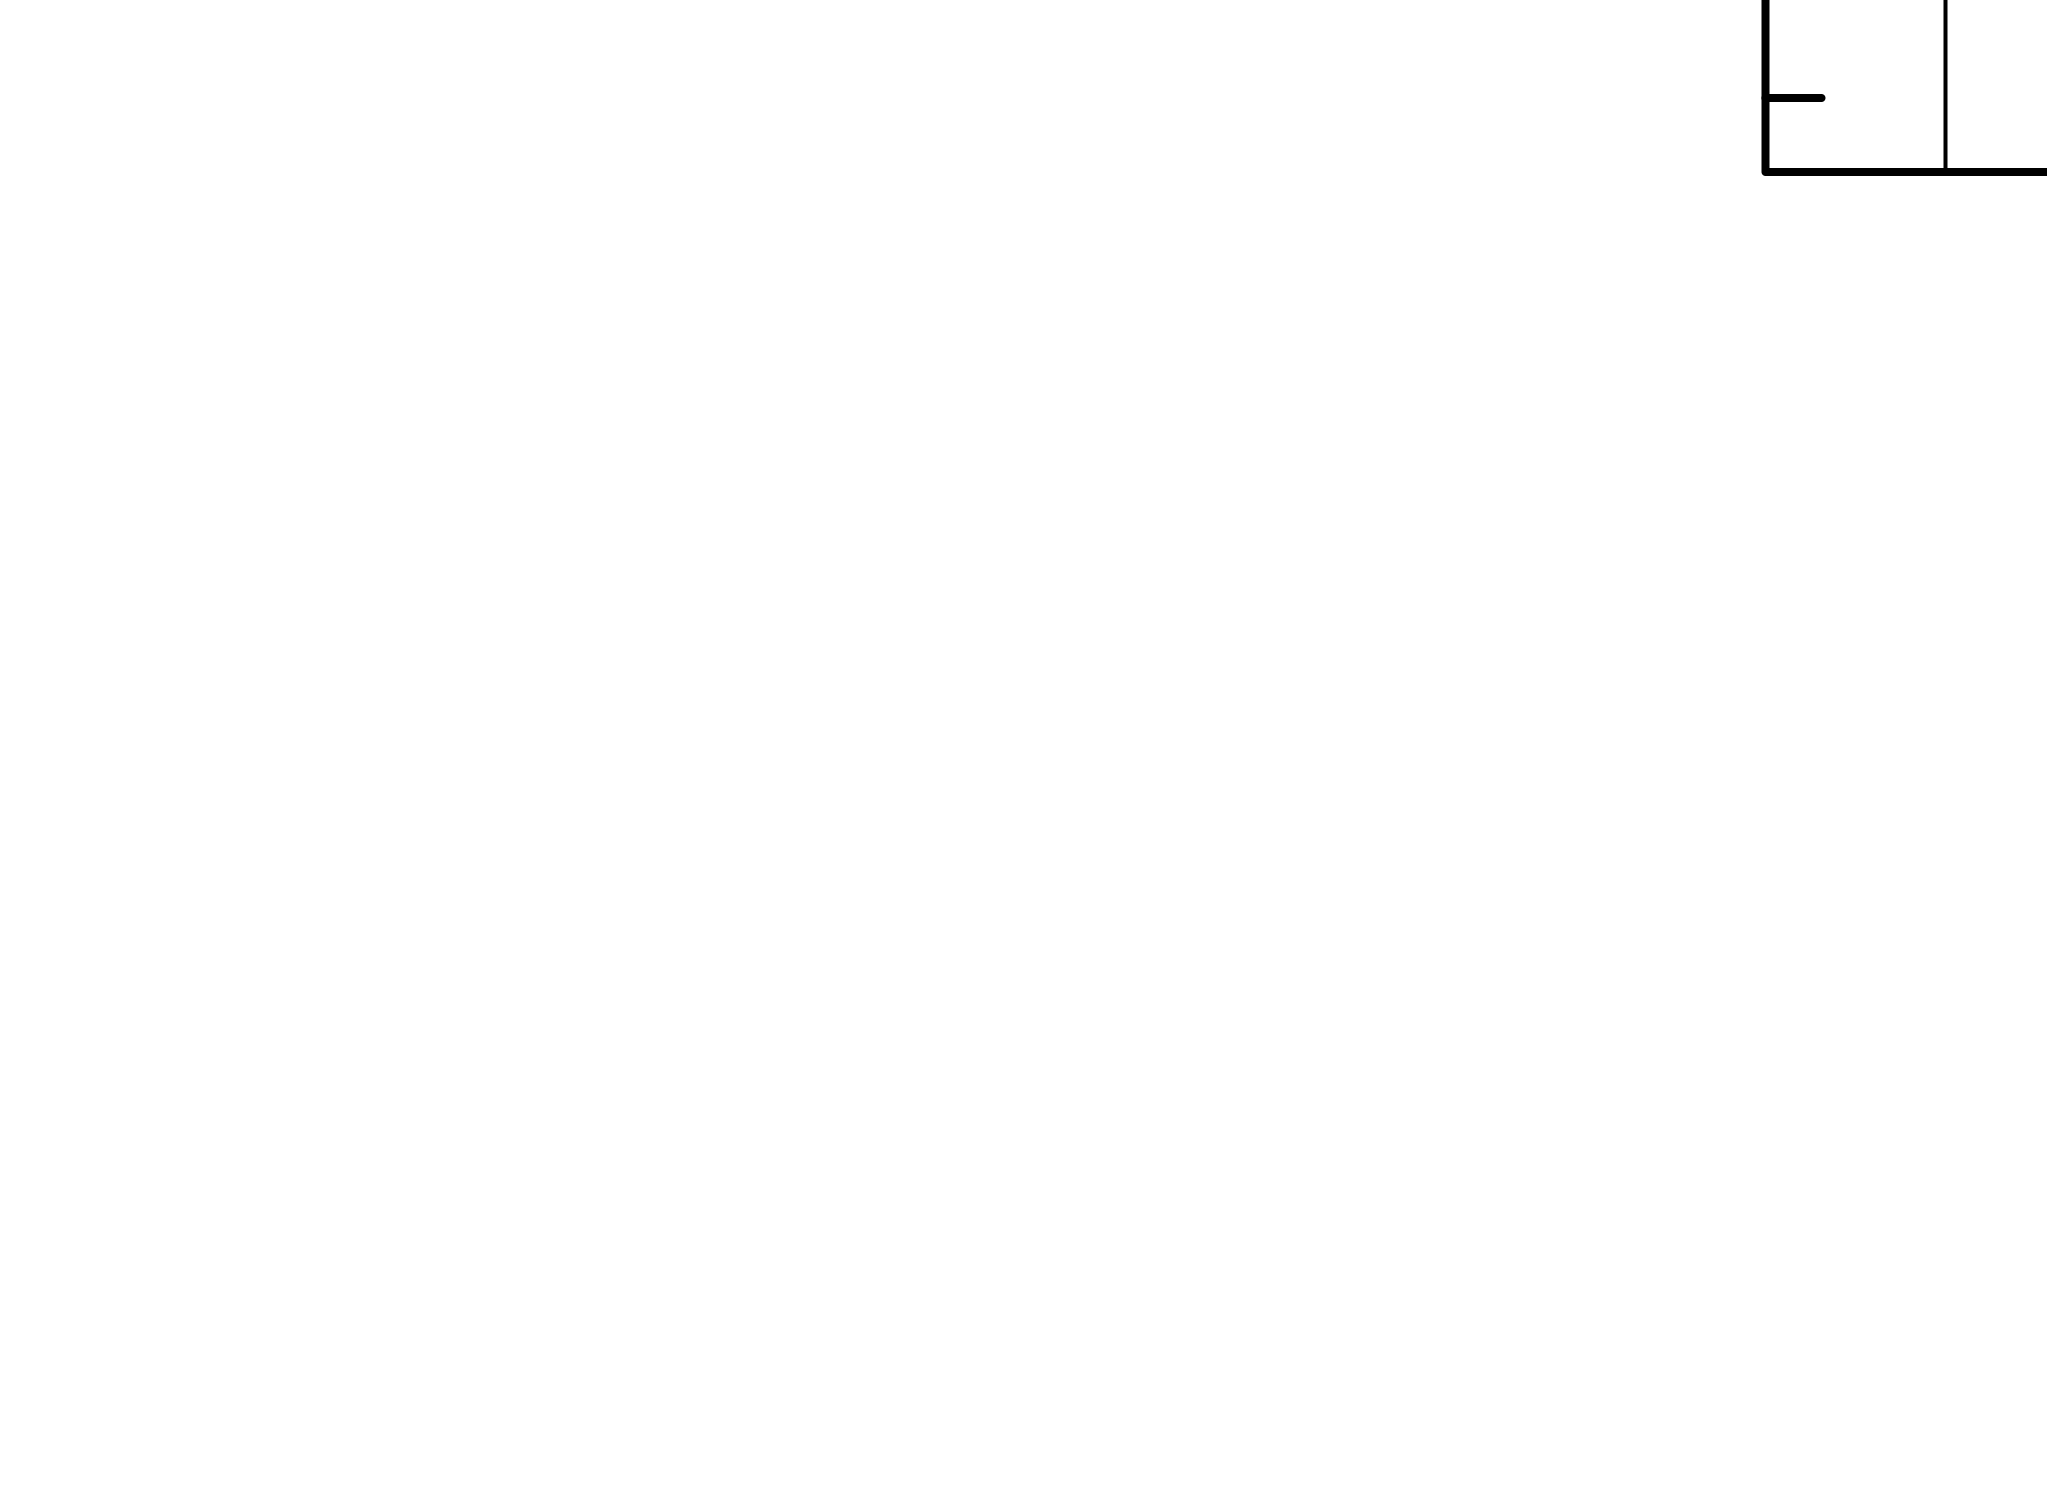

 frozen
  13    4   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.567458e+10     using 57 bins.

Test statistic : Chi-Squared              8.567458e+10     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 50 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              5.788307e+10     using 57 bins.

Test statistic : Chi-Squared              5.788307e+10     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 50 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.557831e+10     using 57 bins.

Test statistic : Chi-Squared              4.557831e+10     using 57 bins.
 Null hypothesis probability of 0.000000e+00 with 50 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.285110e+10     using 

In [12]:
AllModels.clear()
mo = Model("tbabs*(apec+apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
mo.apec_4.kT = 10.0
Fit.perform()
Plot("data resid")